In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [21]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [24]:
train_NaTransport = train.drop("Transported", axis=1)
features = pd.concat([train_NaTransport, test])

<Axes: >

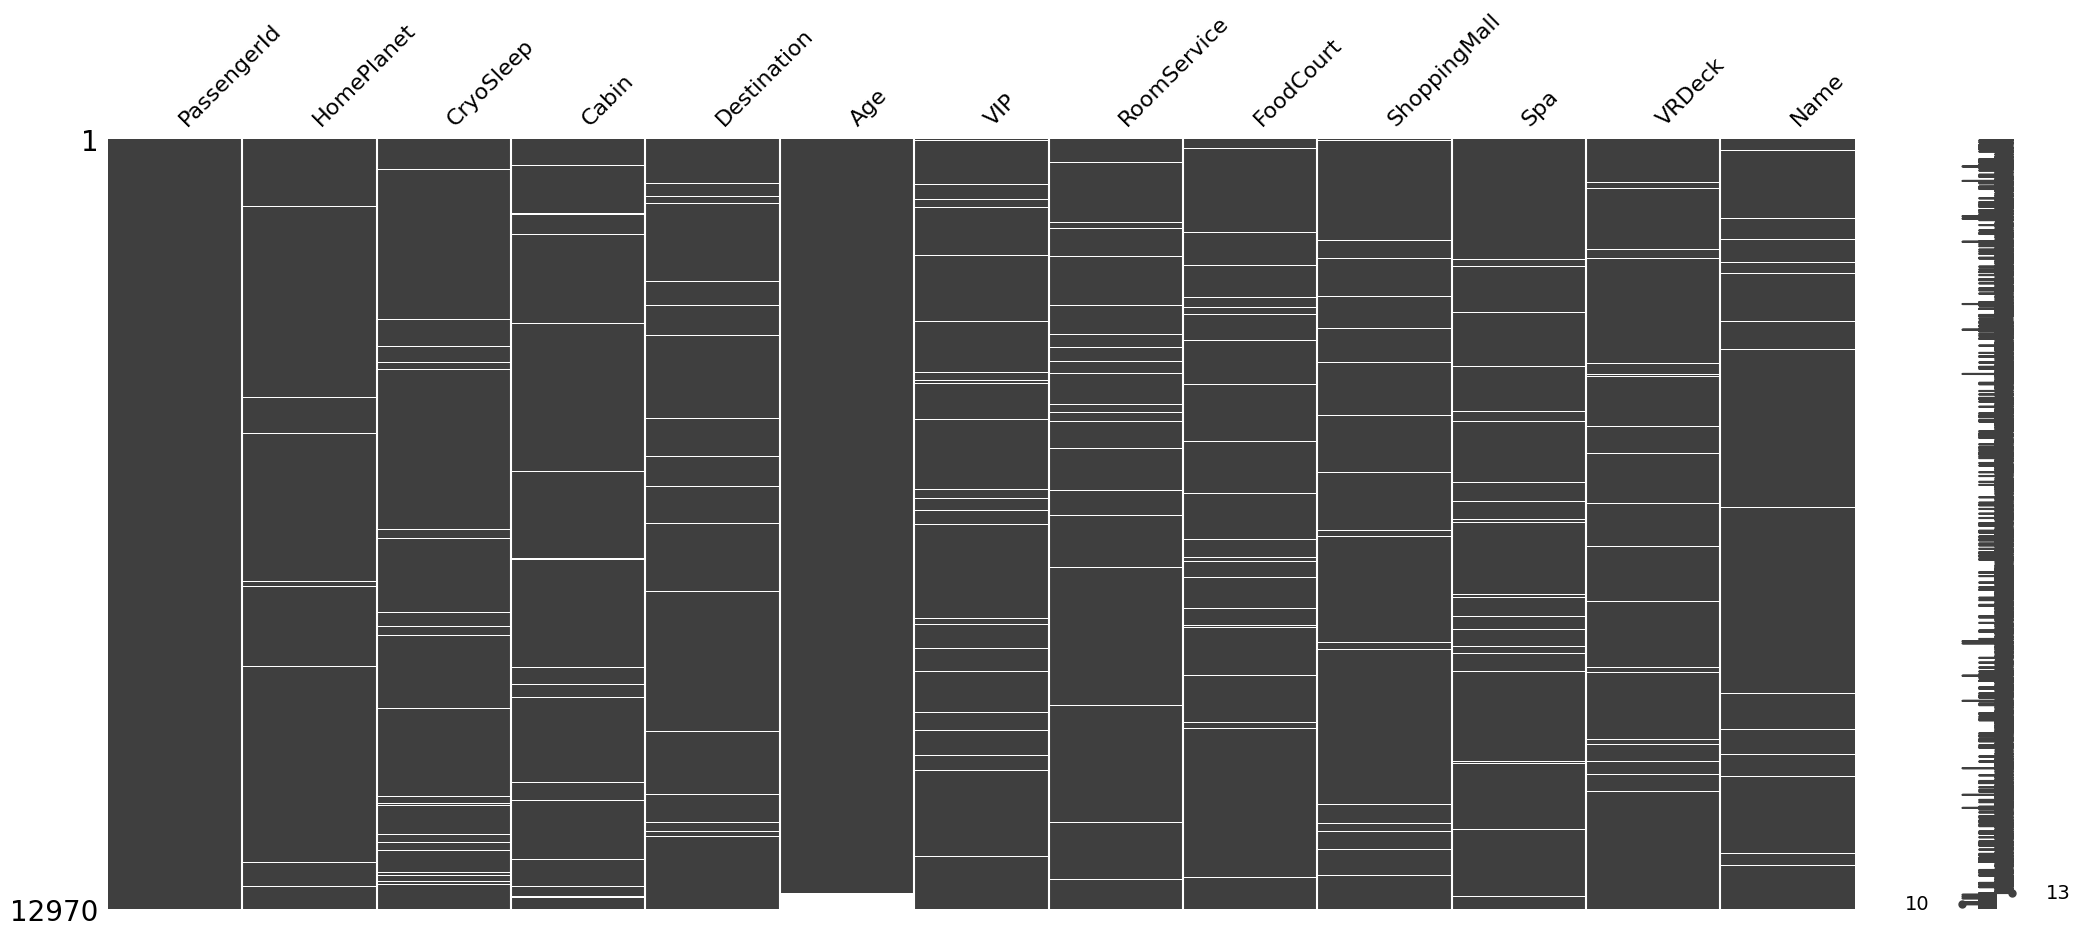

In [25]:
features = features.sort_values('Age')
msno.matrix(features)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



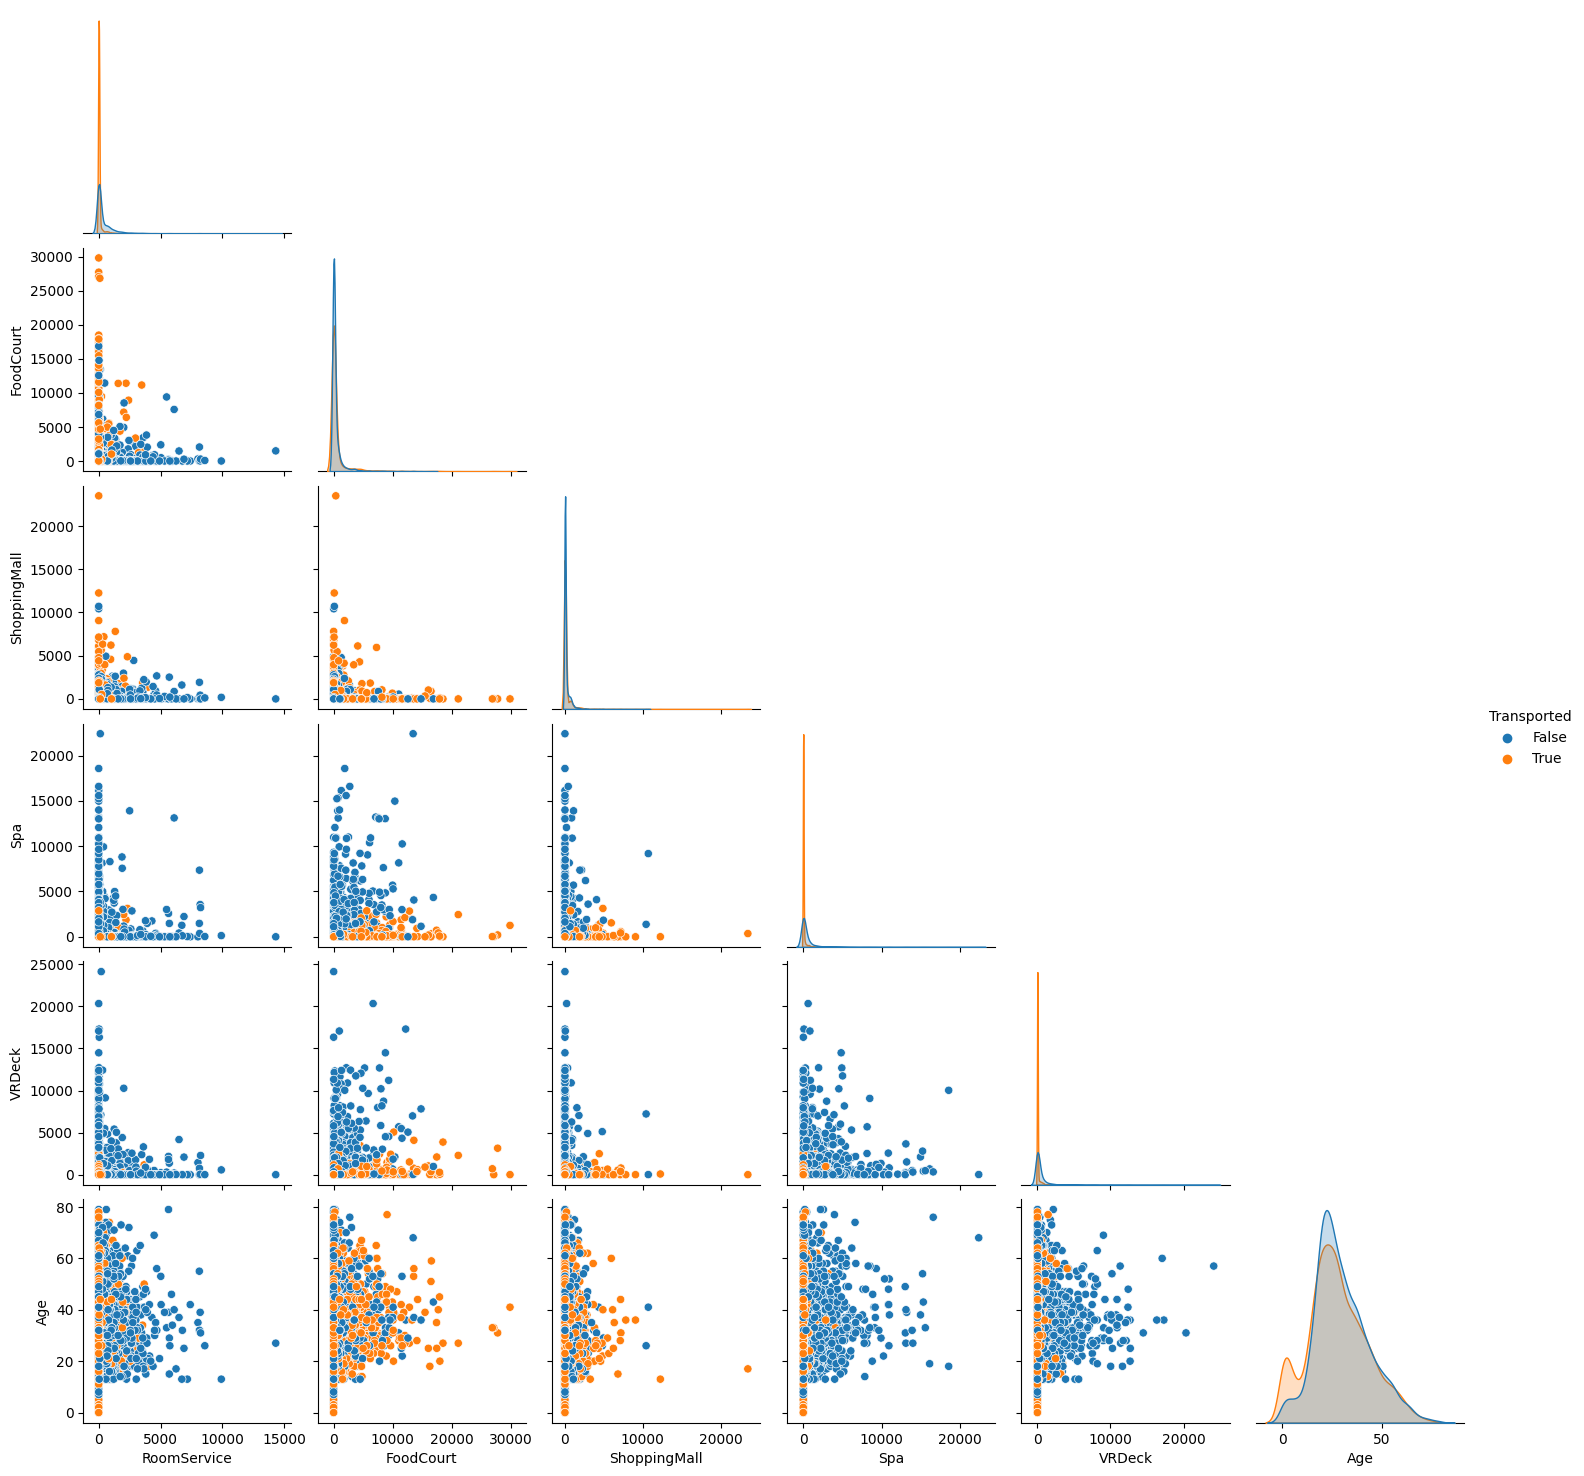

In [26]:
sns.pairplot(data=train, kind="scatter", hue="Transported", diag_kind="auto", corner=True, 
            x_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age'],
            y_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']);

In [27]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

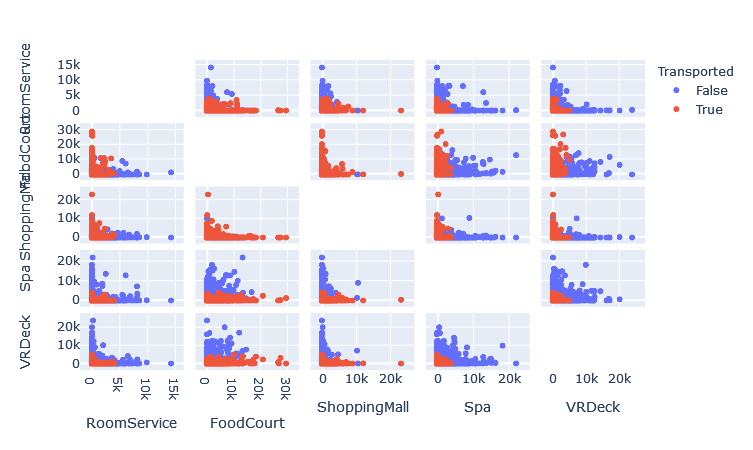

In [28]:
df = train
features = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

fig = px.scatter_matrix(
    df,
    dimensions = features,
    color = "Transported"
)

fig.update_traces(diagonal_visible=False)
fig.show()

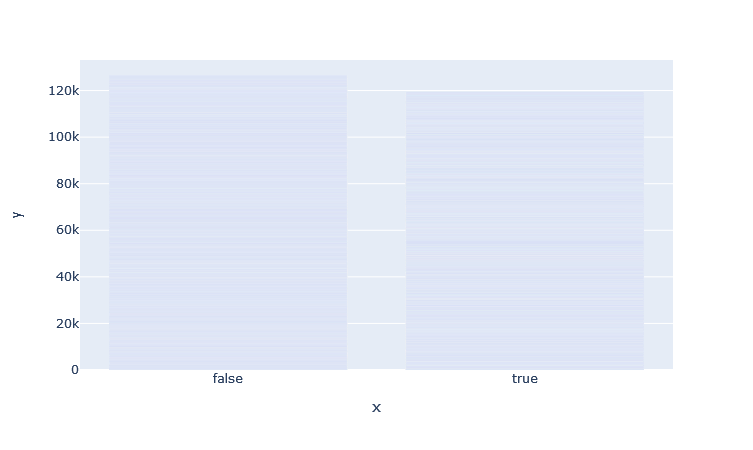

In [29]:
fig = px.bar(x=train["Transported"], y=train["Age"])
fig.show()

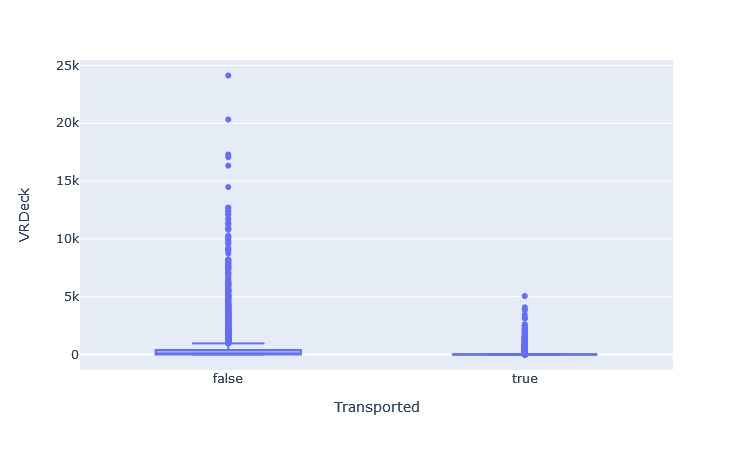

In [30]:
fig = px.box(train, x='Transported', y='VRDeck')
fig.show()

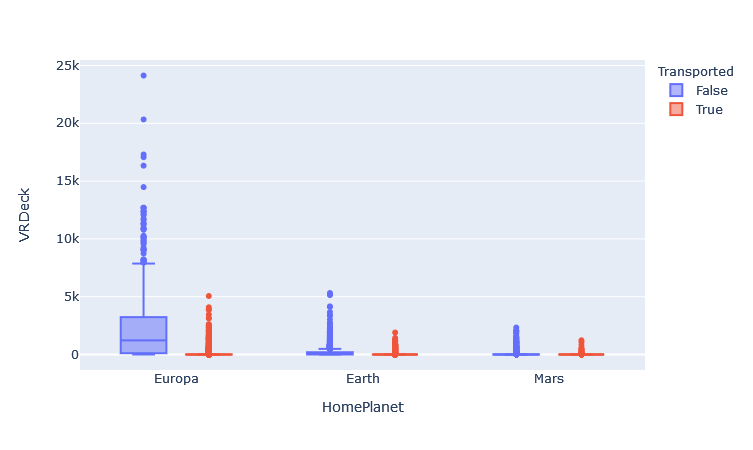

In [31]:
fig = px.box(df, x='HomePlanet', y='VRDeck', color='Transported')
fig.update_traces(quartilemethod="linear") # or "inclusive", or "linear" by default
fig.show()

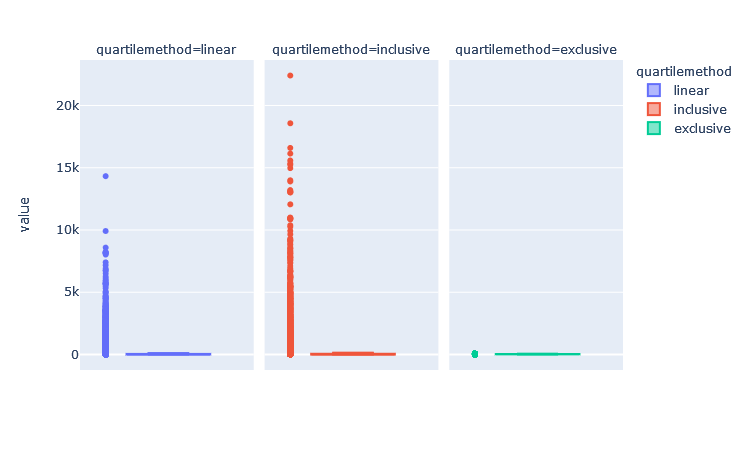

In [32]:
df = pd.DataFrame(dict(
    linear=train['RoomService'],
    inclusive = train['Spa'],
    exclusive = train['Age']
)).melt(var_name='quartilemethod')

fig = px.box(
    df, 
    y='value', 
    facet_col='quartilemethod', 
    color='quartilemethod',
    boxmode='overlay',
    points='all'
)

fig.update_traces(quartilemethod='linear', jitter=0, col=1)
fig.update_traces(quartilemethod='inclusive', jitter=0, col=2)
fig.update_traces(quartilemethod='exclusive', jitter=0, col=3)

fig.show()

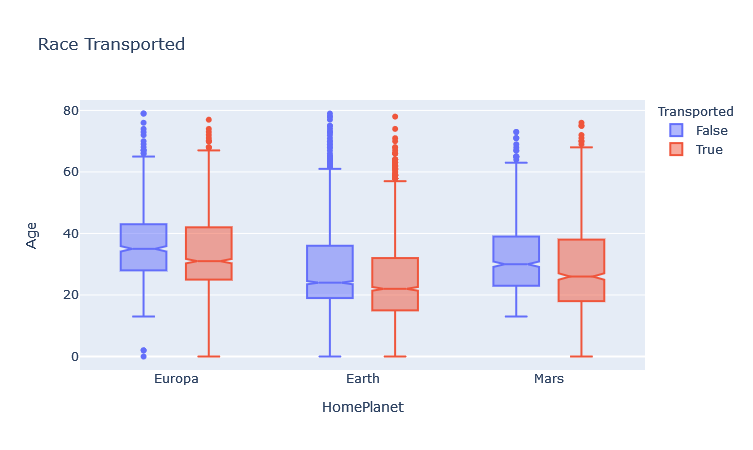

In [33]:
fig = px.box(
    train,
    x='HomePlanet',
    y='Age',
    color='Transported',
    notched=True,
    title='Race Transported',
    hover_data=['Spa']
)

fig.show()

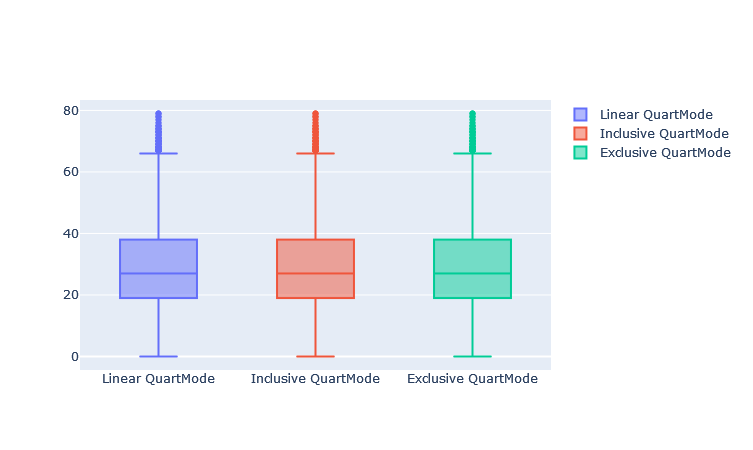

In [34]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=train['Age'], quartilemethod='linear', name='Linear QuartMode'))
fig.add_trace(go.Box(y=train['Age'], quartilemethod='inclusive', name='Inclusive QuartMode'))
fig.add_trace(go.Box(y=train['Age'], quartilemethod='exclusive', name='Exclusive QuartMode'))

fig.show()

In [35]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [36]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

In [38]:

df = train

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Space Titanic', style={'textAlign':'center'}),
    dcc.Dropdown(train['Age'].unique(), 0, id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(age):
    dff = df[df['Age']==age]
    return px.box(dff, x='Transported', y='Spa')

if __name__ == '__main__':
    app.run(debug=True)

In [43]:
app = Dash(__name__)

fig = px.bar(train, x="Age", y="Spa", color="Transported", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
    html.Div(children='''Dash: web app framwork for data'''),
    dcc.Graph(
        id='Example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)